### EDA process

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
farmers = pd.read_csv("agriroute_data/farmers.csv")
drivers = pd.read_csv("agriroute_data/drivers.csv")
market_prices = pd.read_csv("agriroute_data/market_prices.csv")
weather = pd.read_csv("agriroute_data/weather.csv")
distance = pd.read_csv("agriroute_data/distance.csv")

In [7]:
sns.set(style="whitegrid")

## 1. For the farmers 

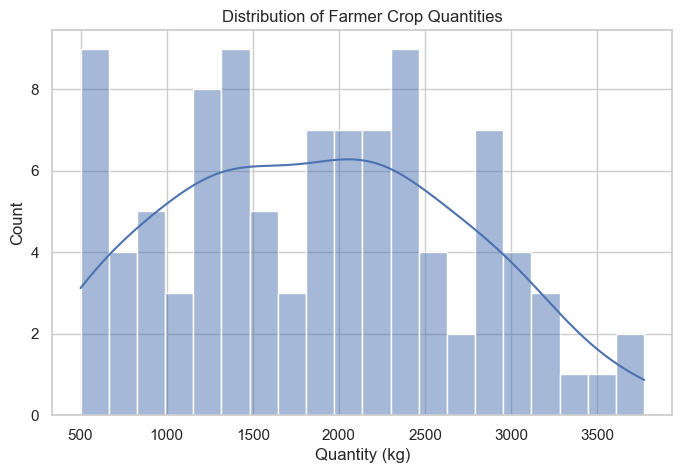

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(farmers['quantity_kg'], bins=20, kde=True)
plt.title("Distribution of Farmer Crop Quantities")
plt.xlabel("Quantity (kg)")
plt.show()

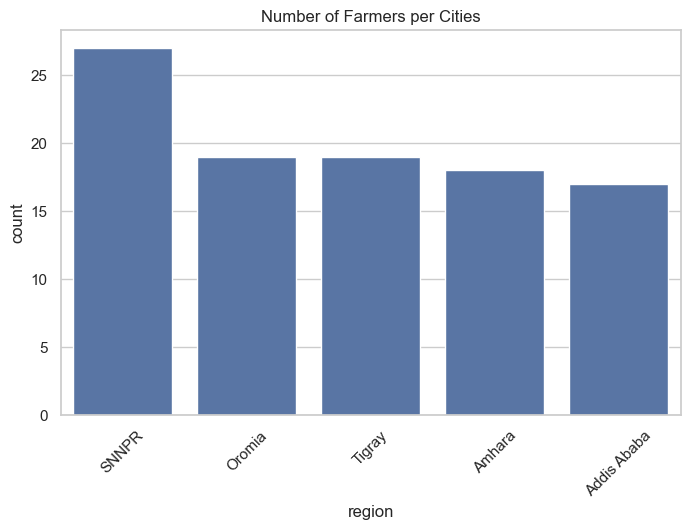

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(data=farmers, x='region', order=farmers['region'].value_counts().index)
plt.title("Number of Farmers per Cities")
plt.xticks(rotation=45)
plt.show()

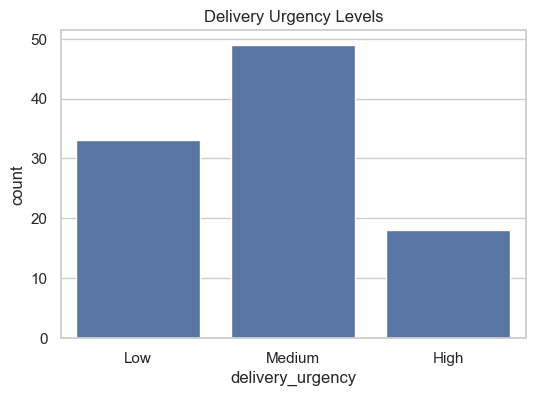

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(data=farmers, x='delivery_urgency', order=['Low','Medium','High'])
plt.title("Delivery Urgency Levels")
plt.show()

## 2. For the dirvers

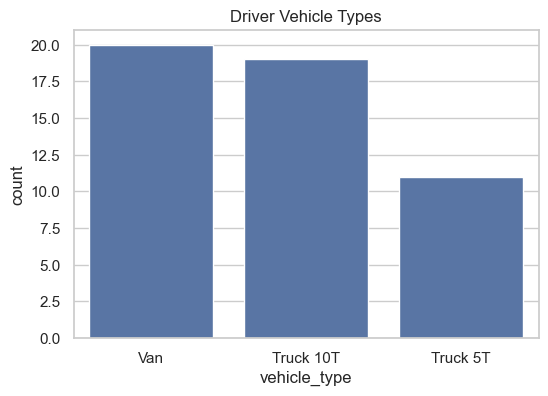

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data=drivers, x='vehicle_type', order=drivers['vehicle_type'].value_counts().index)
plt.title("Driver Vehicle Types")
plt.show()

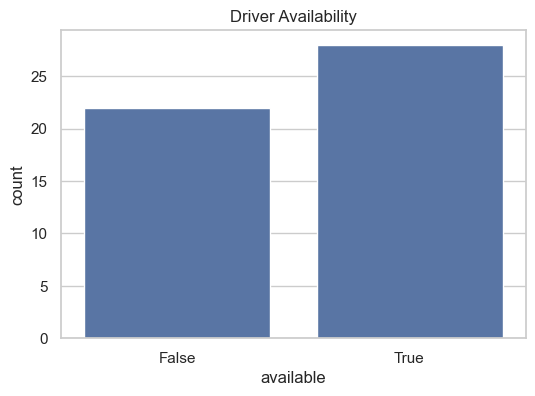

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=drivers, x='available')
plt.title("Driver Availability")
plt.show()

In [13]:
print(drivers.columns)

Index(['driver_id', 'name', 'vehicle_type', 'capacity_kg',
       'fuel_efficiency_km_per_l', 'current_region', 'latitude', 'longitude',
       'available', 'daily_wage_etb', 'max_daily_distance_km'],
      dtype='object')


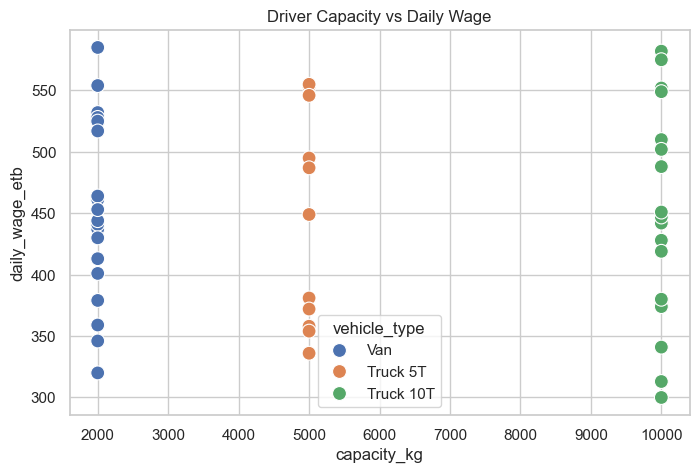

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=drivers, x='capacity_kg', y='daily_wage_etb', hue='vehicle_type', s=100)
plt.title("Driver Capacity vs Daily Wage")
plt.show()

## 3.for market price

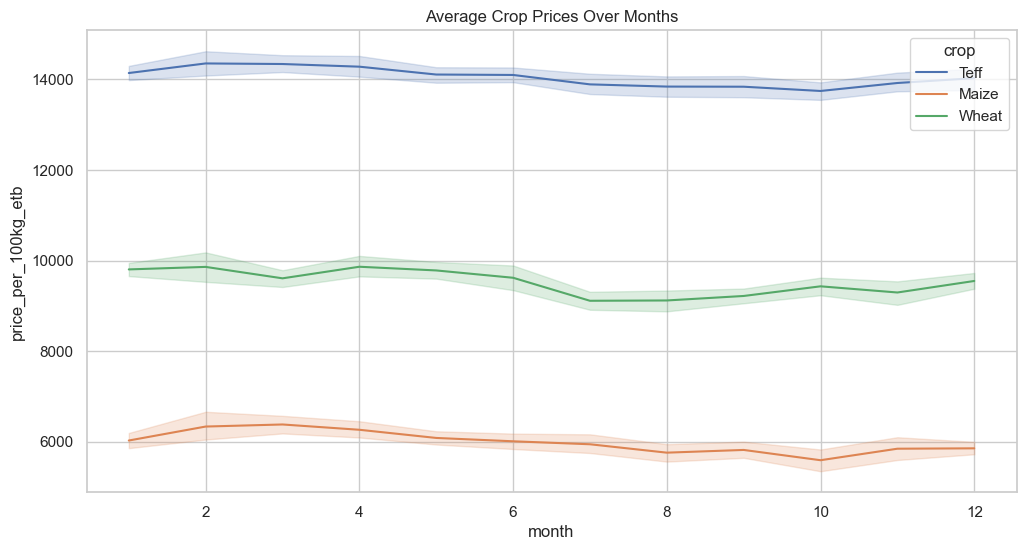

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(data=market_prices, x='month', y='price_per_100kg_etb', hue='crop', estimator='mean')
plt.title("Average Crop Prices Over Months")
plt.show()

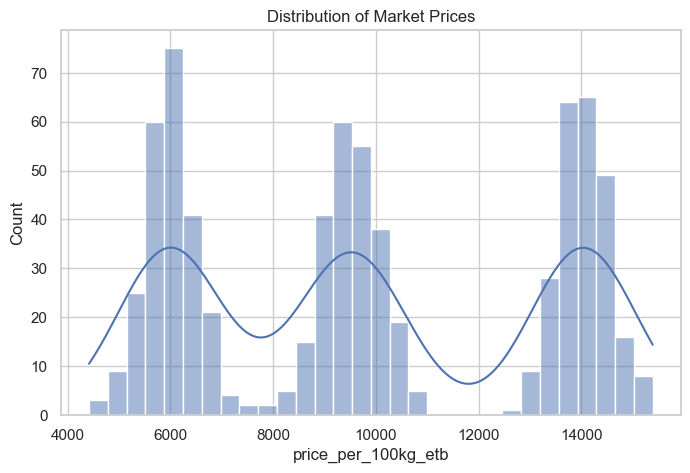

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(market_prices['price_per_100kg_etb'], bins=30, kde=True)
plt.title("Distribution of Market Prices")
plt.show()

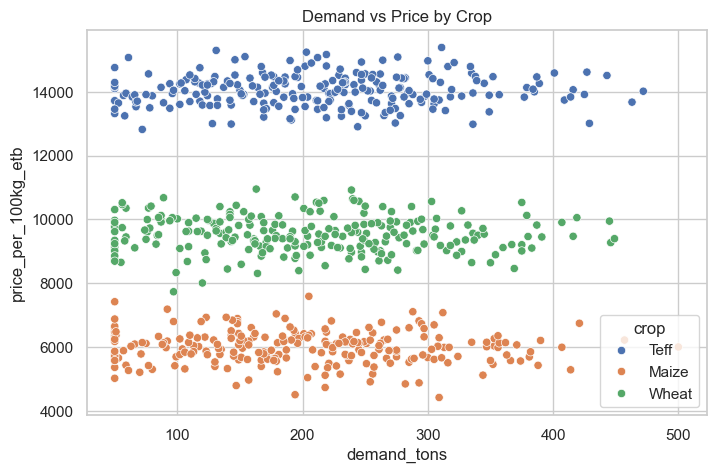

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=market_prices, x='demand_tons', y='price_per_100kg_etb', hue='crop')
plt.title("Demand vs Price by Crop")
plt.show()

## 4. For weather

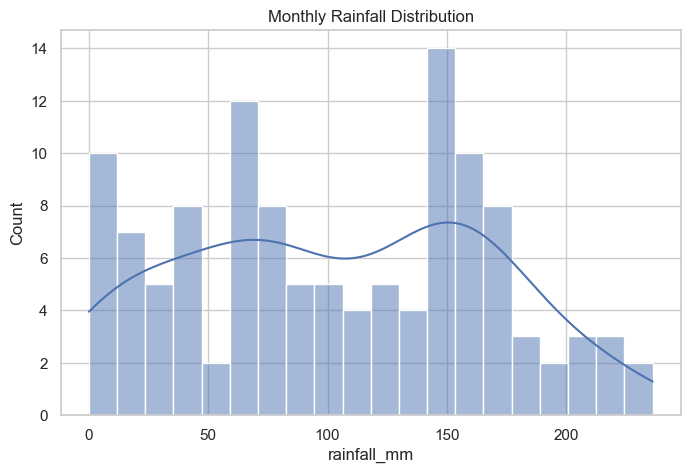

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(weather['rainfall_mm'], bins=20, kde=True)
plt.title("Monthly Rainfall Distribution")
plt.show()

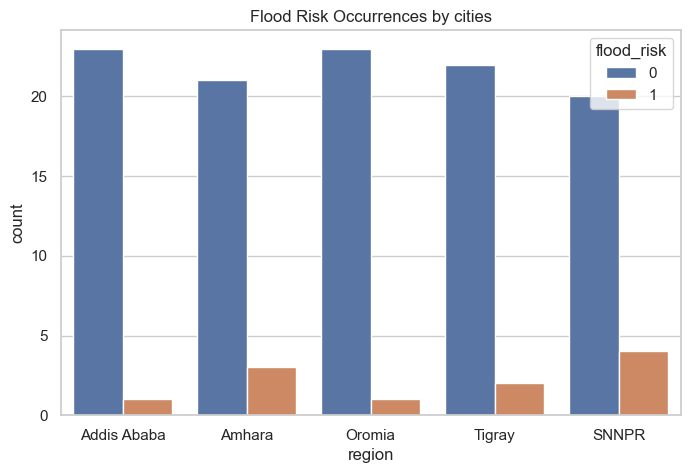

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(data=weather, x='region', hue='flood_risk')
plt.title("Flood Risk Occurrences by cities")
plt.show()

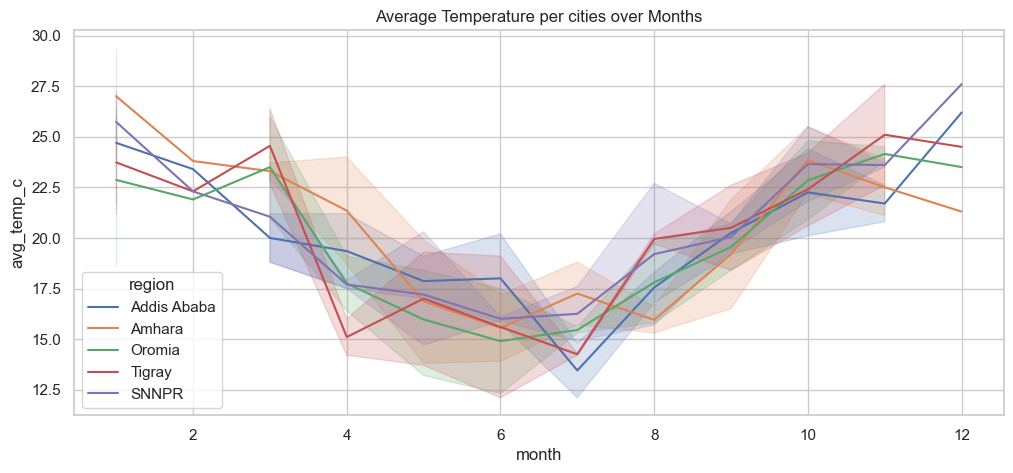

In [33]:
plt.figure(figsize=(12,5))
sns.lineplot(data=weather, x='month', y='avg_temp_c', hue='region', estimator='mean')
plt.title("Average Temperature per cities over Months")
plt.show()

## 5.For Roads or distance

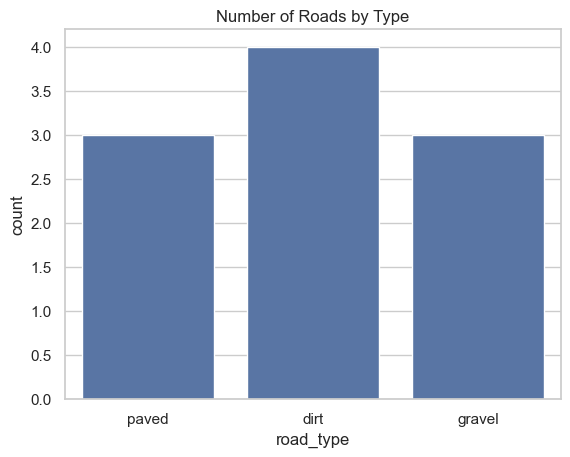

In [51]:
sns.countplot(data=roads, x='road_type')
plt.title("Number of Roads by Type")
plt.show()

In [37]:
avg_distance = roads.groupby('road_type')['distance_km'].mean().sort_values(ascending=False)
print(avg_distance)

road_type
paved     621.533333
gravel    469.666667
dirt      348.175000
Name: distance_km, dtype: float64


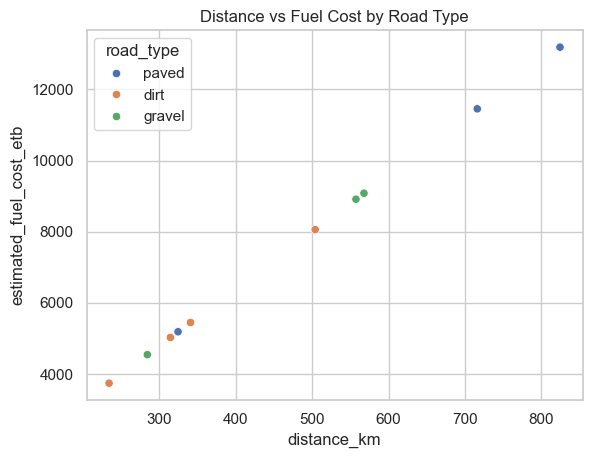

In [52]:
sns.scatterplot(data=roads, x='distance_km', y='estimated_fuel_cost_etb', hue='road_type')
plt.title("Distance vs Fuel Cost by Road Type")
plt.show()

In [53]:
top10 =distance.sort_values('distance_km', ascending=False).head(10)
print(top10[['from_city', 'to_city', 'distance_km']])

      from_city    to_city  distance_km
11      Mekelle    Hawassa        725.5
14      Mekelle      Jimma        708.5
16      Hawassa     Gondar        626.8
19    Dire Dawa      Jimma        593.7
18    Dire Dawa     Gondar        584.6
20       Gondar      Jimma        551.5
8     Bahir Dar  Dire Dawa        538.8
7     Bahir Dar    Hawassa        519.9
12      Mekelle  Dire Dawa        506.4
1   Addis Ababa    Mekelle        503.4


In [55]:
print(distance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   from_city                21 non-null     object 
 1   to_city                  21 non-null     object 
 2   distance_km              21 non-null     float64
 3   road_type                21 non-null     object 
 4   travel_time_hours        21 non-null     float64
 5   flood_prone              21 non-null     int64  
 6   estimated_fuel_cost_etb  21 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.3+ KB
None


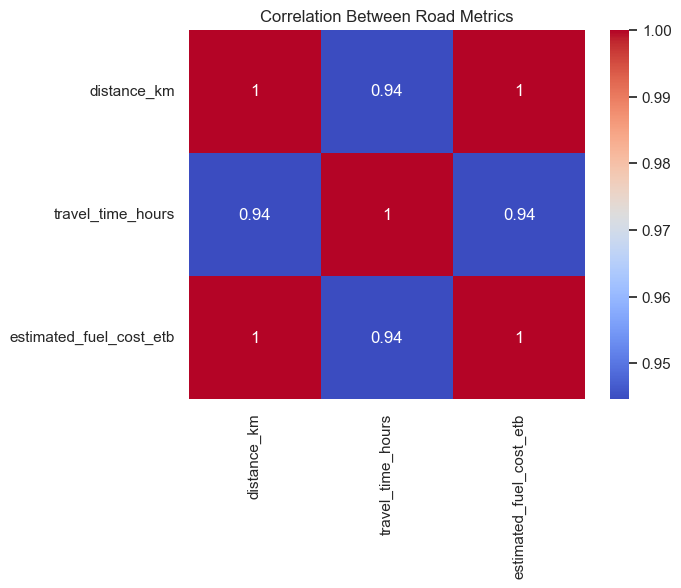

In [56]:
sns.heatmap(distance[['distance_km', 'travel_time_hours', 'estimated_fuel_cost_etb']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Road Metrics")
plt.show()
